## Vi kan introdusere uregelmessigheter til værdata ved diverse funksjoner

Værdataen vi har samlet er nokså fullstendig, og uten feilverdier, men ved bruk av enkelte funksjoner kan vi introdusere noen feil, for så å rette de opp igjen etterpå: 

In [ ]:
import pandas as pd
import numpy as np

df2_errors = pd.read_json("../data/df2_data.json") #leser json filen til "df2"

# introduserer uregelmessigheter (NaN til omtrent 6% av verdiene i mean(relative_humidity P1D))
def introduser_NaN(entry):
    entry.loc[entry.sample(frac=0.06).index, 'mean(relative_humidity P1D)'] = np.nan 
    return entry

# introduserer enkelte tallverdier på 570, som ikke gir mening (uteliggere)
def introduser_uteliggere(entry):
    entry.loc[entry.sample(frac=0.04).index, 'mean(air_temperature P1D)'] = 570
    return df2_errors

#Kjører funksjonene og lagrer til ny fil
nan=introduser_NaN(df2_errors)
uteligger=introduser_uteliggere(nan)



uteligger.to_json('../data/df2_errors.json',indent=4)







## Her kan vi visualisere dataen samlet med seaborn og matplotlib

Først kan vi lage en lett visualisering av en av elementene i luftdataen, f eks NO2 over tid. Her har vi laget en graf fra April til slutten av Mai (ca 2 måneder). 

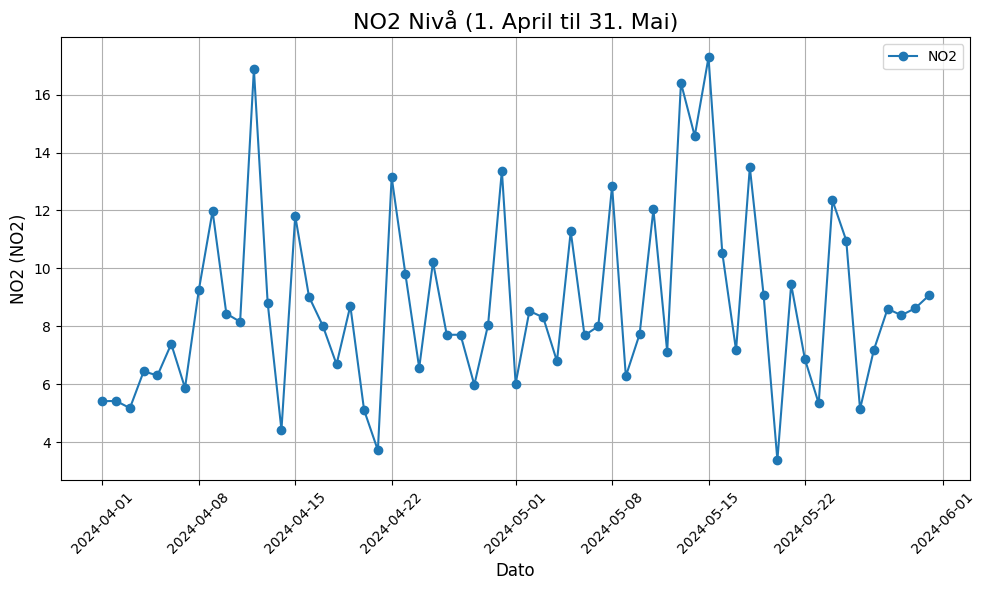

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Luftdata = pd.read_json('../data/df1_data.json')

# bruker pivot_df filtrerer for dato område
Luftdata["date"] = pd.to_datetime(Luftdata["date"]) 
filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-05-31")]


# Velger variabel
variable = "NO2"

# Plotter
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=variable)

# Pynter og justerer grafen
plt.title(f"{variable} Nivå (1. April til 31. Mai)", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

Om vi ønsker å ha hele tidsperioden fra April til slutten av Juli, kan vi gjøre det slik at vi har en gjennomsnittsverdi for 3 dager, slik at det ikke blir for hakkete, og man kan se større mønstre

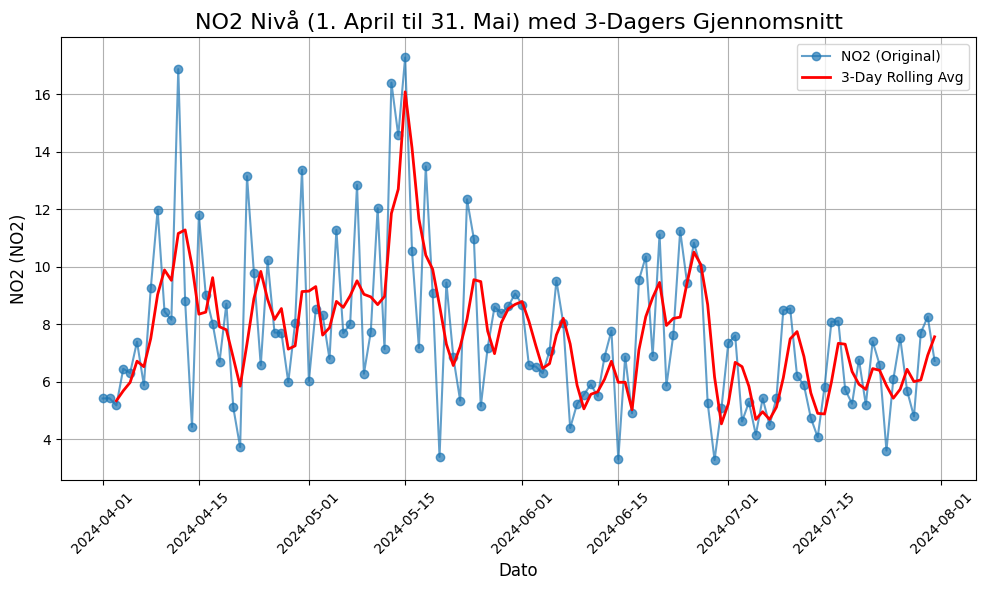

In [3]:

filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-07-31")].copy()

variable = "NO2"

# Velger 3 dagers gjennomsnitt
avg_periode= 3
filtered_df.loc[:,f"{variable}_avg_periode"] = filtered_df[variable].rolling(window=avg_periode).mean()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=f"{variable} (Original)", alpha=0.7)

# Plot the rolling average trendline
plt.plot(filtered_df["date"], filtered_df[f"{variable}_avg_periode"], color="red", label=f"{avg_periode}-Day Rolling Avg", linewidth=2)

# Customize the plot
plt.title(f"{variable} Nivå (1. April til 31. Mai) med {avg_periode}-Dagers Gjennomsnitt", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Her kan vi lettere se trender. Vi kan nå prøve å kombinere flere år å bare beholde "gjennomsnittslinjen" for hvert år uten den fullstendige dataen: 

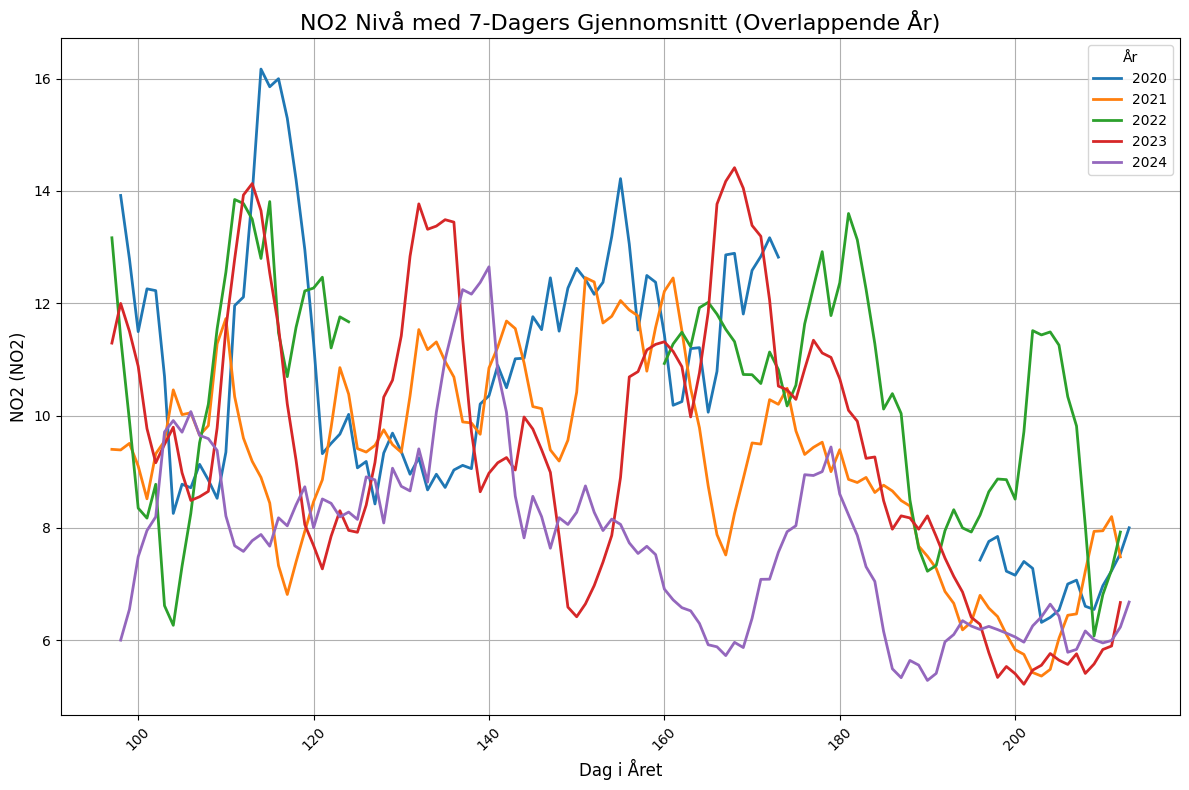

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
Luftdata = pd.read_json('../data/df1_data.json')

# Ensure the date column is in datetime format
Luftdata["date"] = pd.to_datetime(Luftdata["date"])

# Extract the year for grouping
Luftdata["year"] = Luftdata["date"].dt.year

# Variable to analyze
variable = "NO2"

# Rolling average period
avg_periode = 7

# Create a figure
plt.figure(figsize=(12, 8))

# Loop through each year and plot the rolling average
for year, group in Luftdata.groupby("year"):
    group = group.copy()
    group["day_of_year"] = group["date"].dt.day_of_year  # Align dates across years
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    
    # Plot the rolling average
    plt.plot(group["day_of_year"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)

# Customize the plot
plt.title(f"{variable} Nivå med {avg_periode}-Dagers Gjennomsnitt (Overlappende År)", fontsize=16)
plt.xlabel("Dag i Året", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")

# Show the plot
plt.tight_layout()
plt.show()